<a href="https://colab.research.google.com/github/brian6870/machine-learning-tools/blob/main/task3_spacy_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Amazon Reviews Analysis ===
Review 1:
Text: I absolutely love my new iPhone 14 Pro from Apple! The camera quality is amazing and the battery lasts all day.
Sentiment: Positive (Score: 2.5)
Entities found: [('14', 'CARDINAL'), ('Apple', 'ORG'), ('all day', 'DATE')]
Product/Brand entities: ['Apple']
------------------------------------------------------------
Review 2:
Text: This Samsung Galaxy S23 has terrible battery life. Very disappointed with the performance.
Sentiment: Negative (Score: 2.5)
Entities found: [('S23', 'ORG')]
Product/Brand entities: ['S23']
------------------------------------------------------------
Review 3:
Text: The Google Pixel 7 provides the best Android experience with excellent photo quality and smooth performance.
Sentiment: Positive (Score: 3.0)
Entities found: [('The Google Pixel 7', 'ORG'), ('Android', 'ORG')]
Product/Brand entities: ['The Google Pixel 7', 'Android']
------------------------------------------------------------
Review 4:
Text: My Sony W

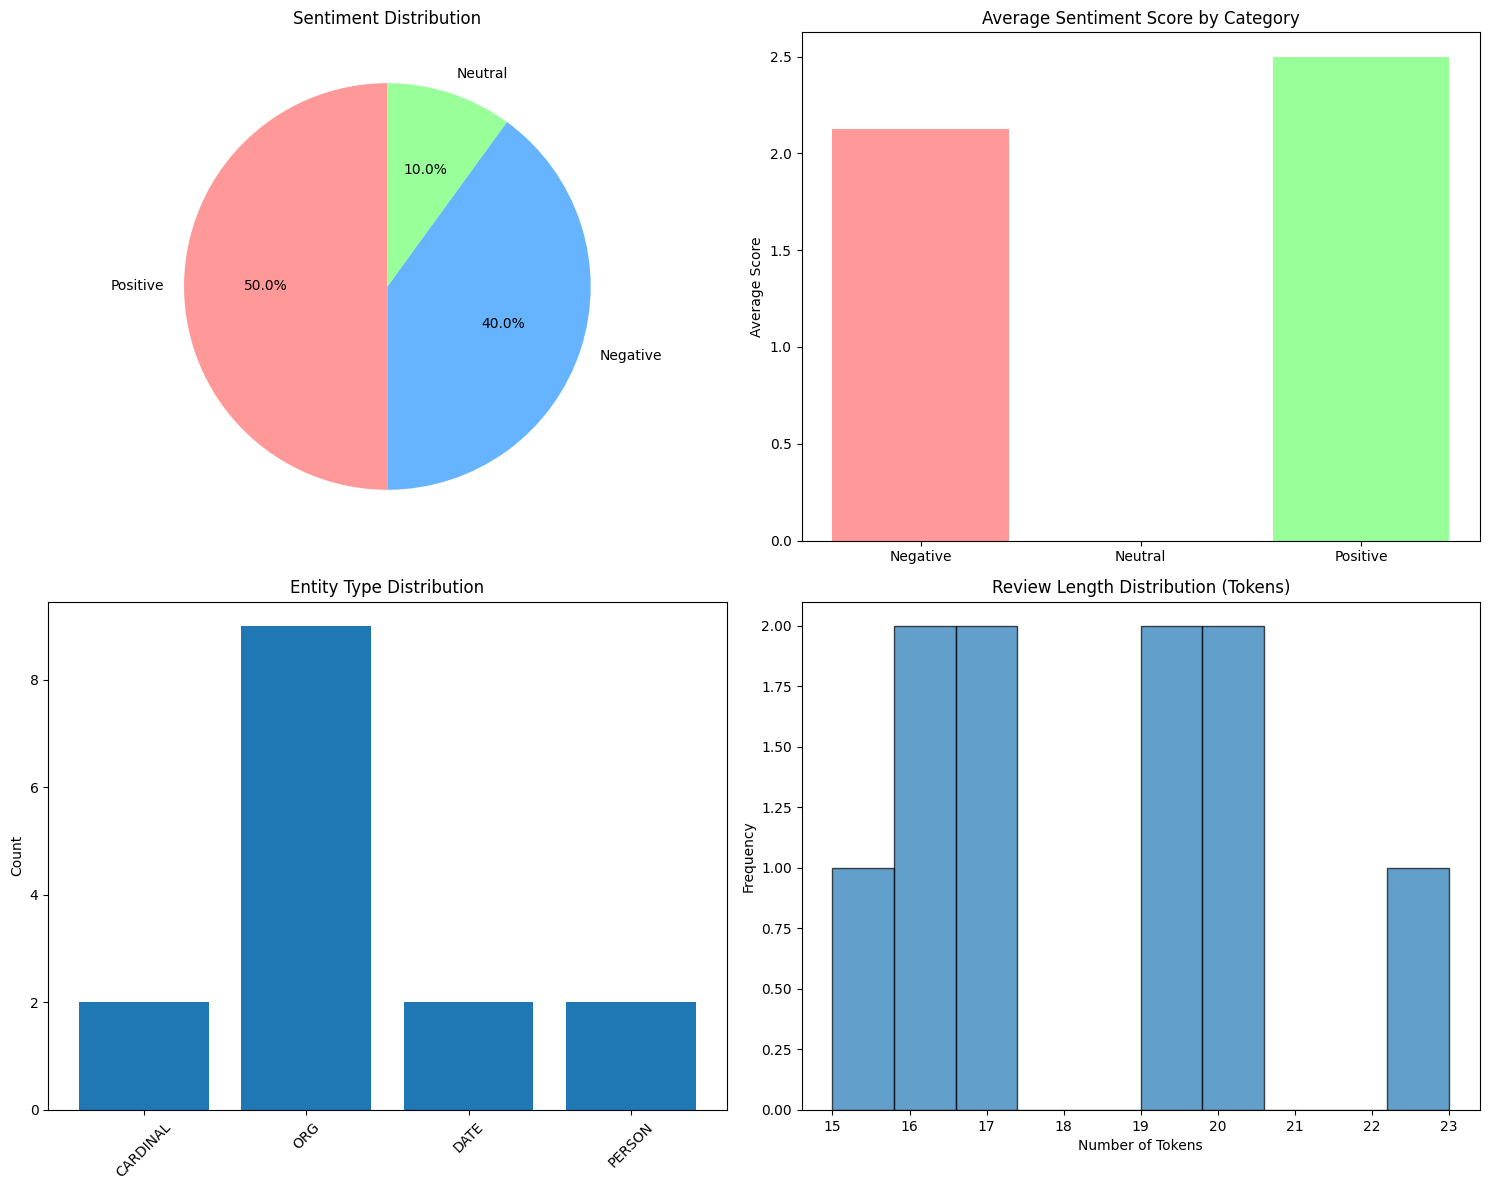

NER visualization saved as ner_visualization.html
Simple NER visualization saved as ner_visualization_simple.html

=== Advanced Analysis ===
Most mentioned products/brands:
  Apple: 1 mentions
  S23: 1 mentions
  The Google Pixel 7: 1 mentions
  Android: 1 mentions
  Sony WH-1000XM4: 1 mentions

Average sentiment by product:
  Apple: Positive (Score: 2.50)
  S23: Positive (Score: 2.50)
  The Google Pixel 7: Positive (Score: 3.00)
  Android: Positive (Score: 3.00)
  Sony WH-1000XM4: Positive (Score: 3.00)
  Microsoft Surface Laptop: Positive (Score: 1.00)
  Apple MacBook Pro: Positive (Score: 3.00)
  HP: Positive (Score: 2.00)
  The Lenovo ThinkPad: Neutral (Score: 0.00)

=== Analysis Complete ===
Processed 10 reviews
Sentiment distribution: {'Positive': np.int64(5), 'Negative': np.int64(4), 'Neutral': np.int64(1)}

=== Sample NER Results ===
  14 -> CARDINAL (Numerals that do not fall under another type)
  Apple -> ORG (Companies, agencies, institutions, etc.)
  all day -> DATE (Absolu

In [2]:
# task3_spacy_nlp.py
import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

class AmazonReviewAnalyzer:
    def __init__(self):
        try:
            self.nlp = spacy.load("en_core_web_sm")
        except OSError:
            print("Downloading spaCy model...")
            from spacy.cli import download
            download("en_core_web_sm")
            self.nlp = spacy.load("en_core_web_sm")

        self.reviews = self.load_sample_reviews()

    def load_sample_reviews(self):
        """Load sample Amazon reviews"""
        reviews = [
            "I absolutely love my new iPhone 14 Pro from Apple! The camera quality is amazing and the battery lasts all day.",
            "This Samsung Galaxy S23 has terrible battery life. Very disappointed with the performance.",
            "The Google Pixel 7 provides the best Android experience with excellent photo quality and smooth performance.",
            "My Sony WH-1000XM4 headphones broke after just two weeks of use. Poor build quality and terrible customer service.",
            "Microsoft Surface Laptop 5 works perfectly for my programming needs. Great performance and build quality!",
            "The Dell XPS 13 is okay, but the keyboard could be better. Average performance for the price.",
            "Apple MacBook Pro with M2 chip is fantastic! Lightning fast and incredible battery life.",
            "This HP laptop constantly crashes and has the worst display I've ever seen. Do not recommend.",
            "Bose QuietComfort headphones have amazing noise cancellation and superb sound quality. Worth every penny!",
            "The Lenovo ThinkPad has a great keyboard but the trackpad is terrible. Mixed feelings about this one."
        ]
        return reviews

    def rule_based_sentiment(self, text):
        """Rule-based sentiment analysis"""
        positive_words = {
            'love', 'amazing', 'excellent', 'perfect', 'best', 'great', 'good',
            'fantastic', 'awesome', 'outstanding', 'superb', 'wonderful', 'brilliant',
            'smooth', 'fast', 'incredible', 'worth', 'recommend', 'lightning'
        }

        negative_words = {
            'terrible', 'disappointed', 'broke', 'poor', 'bad', 'awful', 'worst',
            'horrible', 'terrible', 'crashes', 'worst', 'mixed', 'average', 'okay'
        }

        intensifiers = {'very', 'absolutely', 'really', 'extremely', 'incredibly'}
        negations = {'not', "n't", 'no', 'never'}

        text_lower = text.lower()
        words = text_lower.split()

        positive_score = 0
        negative_score = 0
        intensity = 1.0

        for i, word in enumerate(words):
            # Check for intensifiers
            if word in intensifiers:
                intensity = 1.5
                continue

            # Check for negations
            if word in negations:
                intensity = -1.0
                continue

            # Check positive words
            if word in positive_words:
                positive_score += intensity
                intensity = 1.0  # Reset intensity

            # Check negative words
            if word in negative_words:
                negative_score += intensity
                intensity = 1.0  # Reset intensity

        # Determine sentiment
        if positive_score > negative_score:
            return "Positive", positive_score - negative_score
        elif negative_score > positive_score:
            return "Negative", negative_score - positive_score
        else:
            return "Neutral", 0

    def extract_entities(self, text):
        """Extract named entities from text"""
        doc = self.nlp(text)

        entities = []
        for ent in doc.ents:
            entities.append({
                'text': ent.text,
                'label': ent.label_,
                'description': spacy.explain(ent.label_)
            })

        return entities

    def analyze_reviews(self):
        """Complete analysis of all reviews"""
        results = []

        print("=== Amazon Reviews Analysis ===")
        print("=" * 60)

        for i, review in enumerate(self.reviews, 1):
            # Process with spaCy
            doc = self.nlp(review)

            # Extract entities
            entities = self.extract_entities(review)
            product_entities = [ent for ent in entities if ent['label'] in ['ORG', 'PRODUCT']]

            # Analyze sentiment
            sentiment, score = self.rule_based_sentiment(review)

            # Store results
            result = {
                'review_id': i,
                'review_text': review,
                'sentiment': sentiment,
                'sentiment_score': score,
                'entities': entities,
                'product_entities': product_entities,
                'tokens': len(doc),
                'sentences': len(list(doc.sents))
            }
            results.append(result)

            # Print analysis
            print(f"Review {i}:")
            print(f"Text: {review}")
            print(f"Sentiment: {sentiment} (Score: {score})")
            print(f"Entities found: {[(ent['text'], ent['label']) for ent in entities]}")
            print(f"Product/Brand entities: {[ent['text'] for ent in product_entities]}")
            print("-" * 60)

        return results

    def visualize_analysis(self, results):
        """Create visualizations for the analysis"""
        # Convert to DataFrame for easier analysis
        df = pd.DataFrame(results)

        # Sentiment distribution
        sentiment_counts = df['sentiment'].value_counts()

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

        # Pie chart for sentiment distribution
        colors = ['#ff9999', '#66b3ff', '#99ff99']
        ax1.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
               colors=colors, startangle=90)
        ax1.set_title('Sentiment Distribution')

        # Bar chart for sentiment scores
        sentiment_scores = df.groupby('sentiment')['sentiment_score'].mean()
        ax2.bar(sentiment_scores.index, sentiment_scores.values, color=colors)
        ax2.set_title('Average Sentiment Score by Category')
        ax2.set_ylabel('Average Score')

        # Entity type distribution
        all_entities = []
        for entities in df['entities']:
            all_entities.extend([ent['label'] for ent in entities])

        entity_counts = Counter(all_entities)
        ax3.bar(entity_counts.keys(), entity_counts.values())
        ax3.set_title('Entity Type Distribution')
        ax3.set_ylabel('Count')
        ax3.tick_params(axis='x', rotation=45)

        # Review length distribution
        ax4.hist(df['tokens'], bins=10, alpha=0.7, edgecolor='black')
        ax4.set_title('Review Length Distribution (Tokens)')
        ax4.set_xlabel('Number of Tokens')
        ax4.set_ylabel('Frequency')

        plt.tight_layout()
        plt.savefig('amazon_reviews_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()

        return df

    def generate_ner_visualization(self, review_text, filename='ner_visualization.html'):
        """Generate interactive NER visualization"""
        doc = self.nlp(review_text)

        # Create NER visualization - FIXED VERSION
        # Option 1: Get HTML string without page wrapper
        html = displacy.render(doc, style='ent', page=False)

        # Option 2: Create complete HTML page manually
        if html is None:
            html = displacy.render(doc, style='ent', jupyter=False)

        # Create a complete HTML page
        complete_html = f"""
        <!DOCTYPE html>
        <html lang="en">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>NER Visualization - Amazon Review</title>
            <style>
                body {{
                    font-family: Arial, sans-serif;
                    margin: 40px;
                    background-color: #f5f5f5;
                }}
                .container {{
                    max-width: 800px;
                    margin: 0 auto;
                    background: white;
                    padding: 20px;
                    border-radius: 10px;
                    box-shadow: 0 2px 10px rgba(0,0,0,0.1);
                }}
                .review-text {{
                    background: #f8f9fa;
                    padding: 15px;
                    border-radius: 5px;
                    margin-bottom: 20px;
                    font-style: italic;
                }}
                .entities {{
                    margin-top: 20px;
                }}
            </style>
        </head>
        <body>
            <div class="container">
                <h1>Named Entity Recognition Visualization</h1>
                <div class="review-text">
                    <strong>Review:</strong> {review_text}
                </div>
                <div class="entities">
                    {html if html else "No entities found to visualize."}
                </div>
            </div>
        </body>
        </html>
        """

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(complete_html)

        print(f"NER visualization saved as {filename}")
        return complete_html

    def generate_simple_ner_visualization(self, review_text, filename='ner_visualization_simple.html'):
        """Alternative simpler NER visualization method"""
        doc = self.nlp(review_text)

        # Generate the visualization without page wrapper
        html = displacy.render(doc, style='ent', jupyter=False)

        if html:
            with open(filename, 'w', encoding='utf-8') as f:
                f.write(html)
            print(f"Simple NER visualization saved as {filename}")
        else:
            # Fallback: Create a basic visualization
            self.create_fallback_ner_visualization(doc, filename)

        return html

    def create_fallback_ner_visualization(self, doc, filename):
        """Create a fallback NER visualization when displacy fails"""
        entities_html = []
        for ent in doc.ents:
            color = self.get_entity_color(ent.label_)
            entities_html.append(
                f'<mark style="background-color: {color}; padding: 2px 5px; margin: 2px; border-radius: 3px;">'
                f'{ent.text} <small>({ent.label_})</small>'
                f'</mark>'
            )

        html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
            <title>NER Fallback Visualization</title>
            <style>
                body {{ font-family: Arial, sans-serif; margin: 40px; }}
                .entity {{ margin: 5px; display: inline-block; }}
            </style>
        </head>
        <body>
            <h1>Named Entity Recognition</h1>
            <p><strong>Text:</strong> {doc.text}</p>
            <div class="entities">
                <h3>Entities Found:</h3>
                {" ".join(entities_html)}
            </div>
        </body>
        </html>
        """

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(html_content)
        print(f"Fallback NER visualization saved as {filename}")

    def get_entity_color(self, label):
        """Get color for entity label"""
        color_map = {
            'PERSON': '#ffeb3b',
            'ORG': '#4caf50',
            'PRODUCT': '#2196f3',
            'GPE': '#9c27b0',
            'DATE': '#ff9800',
            'MONEY': '#795548'
        }
        return color_map.get(label, '#cccccc')

    def display_ner_in_notebook(self, review_text):
        """Display NER visualization in Jupyter notebook"""
        doc = self.nlp(review_text)
        return displacy.render(doc, style='ent', jupyter=True)

    def advanced_analysis(self, df):
        """Perform advanced analysis"""
        print("\n=== Advanced Analysis ===")

        # Most mentioned products/brands
        all_product_entities = []
        for entities in df['entities']:
            all_product_entities.extend([ent['text'] for ent in entities if ent['label'] in ['ORG', 'PRODUCT']])

        product_counts = Counter(all_product_entities)
        print("Most mentioned products/brands:")
        for product, count in product_counts.most_common(5):
            print(f"  {product}: {count} mentions")

        # Sentiment by product
        product_sentiments = {}
        for _, row in df.iterrows():
            for entity in row['product_entities']:
                product = entity['text']
                if product not in product_sentiments:
                    product_sentiments[product] = []
                product_sentiments[product].append(row['sentiment_score'])

        print("\nAverage sentiment by product:")
        for product, scores in product_sentiments.items():
            if scores:  # Check if scores list is not empty
                avg_score = sum(scores) / len(scores)
                sentiment = "Positive" if avg_score > 0 else "Negative" if avg_score < 0 else "Neutral"
                print(f"  {product}: {sentiment} (Score: {avg_score:.2f})")

    def run_complete_analysis(self):
        """Run complete NLP analysis pipeline"""
        # Analyze reviews
        results = self.analyze_reviews()

        # Visualize results
        df = self.visualize_analysis(results)

        # Generate NER visualization for a sample review
        sample_review = self.reviews[0]
        try:
            self.generate_ner_visualization(sample_review, 'ner_visualization.html')
            # Also generate simple version
            self.generate_simple_ner_visualization(sample_review, 'ner_visualization_simple.html')
        except Exception as e:
            print(f"Error generating NER visualization: {e}")
            print("Continuing with other analyses...")

        # Advanced analysis
        self.advanced_analysis(df)

        return df

if __name__ == "__main__":
    # Run complete NLP analysis
    analyzer = AmazonReviewAnalyzer()
    results_df = analyzer.run_complete_analysis()

    print("\n=== Analysis Complete ===")
    print(f"Processed {len(results_df)} reviews")
    sentiment_dist = results_df['sentiment'].value_counts()
    print(f"Sentiment distribution: {dict(sentiment_dist)}")

    # Display sample NER in console if running in terminal
    print("\n=== Sample NER Results ===")
    sample_review = analyzer.reviews[0]
    doc = analyzer.nlp(sample_review)
    for ent in doc.ents:
        print(f"  {ent.text} -> {ent.label_} ({spacy.explain(ent.label_)})")